# Machine Learning (Deep Learning)Based

# 1. Re-code the house price machine learning

In [371]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
import functools

In [196]:
data = datasets.load_boston()

假设房价满足一个多元一次方程, $\theta$是方程的参数

In [338]:
def hypothesis(theta, X):
    """y = theta * x + b
    """
    if len(X.shape) == 2:
        return (X * theta).sum(1)
    else:
        return (X * theta).sum()

使用均方损失，则代价函数为

$$J_{\theta} = \frac{1}{2m} \sum_{i=1}^m ( h_\theta(x^i) - y^i)^2 $$

In [340]:
def cost_func(X, y):
    """
    代价函数
    :param X:
    :param y:
    :return:
    """
    def f(theta):
        y_hat = hypothesis(theta, X)
        # 计算均方损失
        return np.sum(np.power((y - y_hat), 2))/len(y) / 2
    return f

代价函数对自变量求导，单个$\theta$的偏导数为
$$\begin{align}
\frac{\partial }{\partial \theta_j} J(\theta_0,\theta_1,...,\theta_n) &= \frac{1}{2m} \sum_{i=1}^m ( h_\theta(x_0^i,x_1^i,x_2^i,...,x_n^i) - y^i)^2 d\theta_j \\
&= \frac{1}{m} \sum_{i=1}^m ( h_\theta(x_0^i,x_1^i,x_2^i,...,x_n^i) - y^i)x_j^i
\end{align}$$

In [343]:
def cost_func_gradient(X, y):
    """
    求代价函数的梯度
    :param X:
    :param y:
    :return:
    """
    def f(theta):
        m = len(X)
        partial_theta = []
        yhat = hypothesis(theta, X)
        for j, t in enumerate(theta):
            x_ij = [x[j] for x in X]
            pt = ((yhat - y) * x_ij).sum() / m
            partial_theta.append(pt)
        return np.array(partial_theta)
    return f

In [344]:
def computeNumericalGradient(loss_func, x):
    """
    使用极限来计算梯度，用于验证导数梯度的正确性
    :param loss_func:
    :param x:
    :return:
    """
    e = 1e-4;
    if isinstance(x, np.ndarray):
        numgrad = []
        for j, t in enumerate(x):
            perturb = np.zeros(x.shape)
            perturb[j] = e
            loss1 = loss_func(x - perturb)
            loss2 = loss_func(x + perturb)
            ng = (loss2 - loss1) / (2 * e);
            numgrad.append(ng)
        return np.array(numgrad)
    else:
        loss1 = loss_func(x - e)
        loss2 = loss_func(x + e)
        ng = (loss2 - loss1) / (2 * e)
        return ng

In [401]:
def get_random_theta(l):
    """
    随机初始化一个点
    :param l:
    :return:
    """
    import random
    return np.array([random.random() * 200 - 100 for i in range(0, l)])

In [385]:
X, y = data['data'], data['target']
feature_num = X.shape[1]
# 随机生成一些点计算梯度
thetas = [get_random_theta(feature_num) for i in range(0,10)]
numgrad = np.array([ computeNumericalGradient(cost_func(X, y), t) for t in thetas])
grad = np.array([ cost_func_gradient(X, y)(t) for t in thetas])

In [386]:
# 差别足够小则认为导函数是正确的

In [387]:
diff = np.linalg.norm(numgrad-grad)/np.linalg.norm(numgrad+grad)
diff

5.838608901034397e-11

In [388]:
def gradient_descent(start, f, df, learning_rate=0.1, max_iter=1000, accuracy = 0.001):
    # 批量梯度下降
    x = start
    num_iter = 0
    lastValue = np.inf
    trace_point = []
    while num_iter <= max_iter:
        v = f(x)
        print("num_iter = %f, v  = %f" % (num_iter, v))
        trace_point.append((x, v))
        diff = abs(v - lastValue)
        if diff <= accuracy:
            break
        lastValue = v
        g = df(x)
        x = x - learning_rate * g
        num_iter += 1
    return x, np.array(trace_point)


In [389]:
X, y = data['data'], data['target']
b = np.ones(len(X))
# 把自变量归一化一下
X = (X-X.min(0))/(X.max(0)-X.min(0))
X = np.column_stack((X,b))

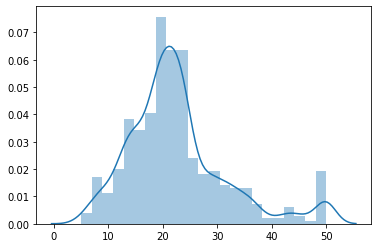

In [390]:
sns.distplot(y)

In [394]:
feature_num = X.shape[1]
start_theta = get_random_theta(feature_num)
extremum_theta, traces = gradient_descent(start_theta, cost_func(X, y), functools.partial(computeNumericalGradient, cost_func(X, y)), max_iter=1000, learning_rate=0.1)

num_iter = 0.000000, v  = 12461.601673
num_iter = 1.000000, v  = 5238.855335
num_iter = 2.000000, v  = 2427.113278
num_iter = 3.000000, v  = 1327.082760
num_iter = 4.000000, v  = 891.517511
num_iter = 5.000000, v  = 714.103743
num_iter = 6.000000, v  = 637.186434
num_iter = 7.000000, v  = 599.582019
num_iter = 8.000000, v  = 577.535429
num_iter = 9.000000, v  = 561.813599
num_iter = 10.000000, v  = 548.818539
num_iter = 11.000000, v  = 537.139474
num_iter = 12.000000, v  = 526.215137
num_iter = 13.000000, v  = 515.814727
num_iter = 14.000000, v  = 505.836475
num_iter = 15.000000, v  = 496.229450
num_iter = 16.000000, v  = 486.963159
num_iter = 17.000000, v  = 478.015713
num_iter = 18.000000, v  = 469.369189
num_iter = 19.000000, v  = 461.007787
num_iter = 20.000000, v  = 452.917075
num_iter = 21.000000, v  = 445.083667
num_iter = 22.000000, v  = 437.495051
num_iter = 23.000000, v  = 430.139506
num_iter = 24.000000, v  = 423.006028
num_iter = 25.000000, v  = 416.084280
num_iter = 26.000

num_iter = 248.000000, v  = 78.519643
num_iter = 249.000000, v  = 78.275418
num_iter = 250.000000, v  = 78.033215
num_iter = 251.000000, v  = 77.793004
num_iter = 252.000000, v  = 77.554760
num_iter = 253.000000, v  = 77.318455
num_iter = 254.000000, v  = 77.084061
num_iter = 255.000000, v  = 76.851554
num_iter = 256.000000, v  = 76.620908
num_iter = 257.000000, v  = 76.392096
num_iter = 258.000000, v  = 76.165095
num_iter = 259.000000, v  = 75.939880
num_iter = 260.000000, v  = 75.716427
num_iter = 261.000000, v  = 75.494713
num_iter = 262.000000, v  = 75.274714
num_iter = 263.000000, v  = 75.056407
num_iter = 264.000000, v  = 74.839770
num_iter = 265.000000, v  = 74.624781
num_iter = 266.000000, v  = 74.411418
num_iter = 267.000000, v  = 74.199660
num_iter = 268.000000, v  = 73.989486
num_iter = 269.000000, v  = 73.780875
num_iter = 270.000000, v  = 73.573808
num_iter = 271.000000, v  = 73.368263
num_iter = 272.000000, v  = 73.164222
num_iter = 273.000000, v  = 72.961665
num_iter = 2

num_iter = 498.000000, v  = 46.614056
num_iter = 499.000000, v  = 46.542224
num_iter = 500.000000, v  = 46.470620
num_iter = 501.000000, v  = 46.399241
num_iter = 502.000000, v  = 46.328088
num_iter = 503.000000, v  = 46.257158
num_iter = 504.000000, v  = 46.186451
num_iter = 505.000000, v  = 46.115965
num_iter = 506.000000, v  = 46.045699
num_iter = 507.000000, v  = 45.975653
num_iter = 508.000000, v  = 45.905826
num_iter = 509.000000, v  = 45.836215
num_iter = 510.000000, v  = 45.766820
num_iter = 511.000000, v  = 45.697641
num_iter = 512.000000, v  = 45.628675
num_iter = 513.000000, v  = 45.559922
num_iter = 514.000000, v  = 45.491381
num_iter = 515.000000, v  = 45.423051
num_iter = 516.000000, v  = 45.354931
num_iter = 517.000000, v  = 45.287019
num_iter = 518.000000, v  = 45.219315
num_iter = 519.000000, v  = 45.151818
num_iter = 520.000000, v  = 45.084526
num_iter = 521.000000, v  = 45.017440
num_iter = 522.000000, v  = 44.950557
num_iter = 523.000000, v  = 44.883877
num_iter = 5

num_iter = 739.000000, v  = 34.037218
num_iter = 740.000000, v  = 33.999413
num_iter = 741.000000, v  = 33.961694
num_iter = 742.000000, v  = 33.924062
num_iter = 743.000000, v  = 33.886517
num_iter = 744.000000, v  = 33.849057
num_iter = 745.000000, v  = 33.811682
num_iter = 746.000000, v  = 33.774393
num_iter = 747.000000, v  = 33.737189
num_iter = 748.000000, v  = 33.700070
num_iter = 749.000000, v  = 33.663035
num_iter = 750.000000, v  = 33.626084
num_iter = 751.000000, v  = 33.589218
num_iter = 752.000000, v  = 33.552434
num_iter = 753.000000, v  = 33.515735
num_iter = 754.000000, v  = 33.479118
num_iter = 755.000000, v  = 33.442584
num_iter = 756.000000, v  = 33.406133
num_iter = 757.000000, v  = 33.369764
num_iter = 758.000000, v  = 33.333477
num_iter = 759.000000, v  = 33.297272
num_iter = 760.000000, v  = 33.261148
num_iter = 761.000000, v  = 33.225106
num_iter = 762.000000, v  = 33.189144
num_iter = 763.000000, v  = 33.153264
num_iter = 764.000000, v  = 33.117463
num_iter = 7

num_iter = 985.000000, v  = 26.799750
num_iter = 986.000000, v  = 26.776993
num_iter = 987.000000, v  = 26.754278
num_iter = 988.000000, v  = 26.731605
num_iter = 989.000000, v  = 26.708975
num_iter = 990.000000, v  = 26.686386
num_iter = 991.000000, v  = 26.663840
num_iter = 992.000000, v  = 26.641336
num_iter = 993.000000, v  = 26.618873
num_iter = 994.000000, v  = 26.596452
num_iter = 995.000000, v  = 26.574073
num_iter = 996.000000, v  = 26.551735
num_iter = 997.000000, v  = 26.529439
num_iter = 998.000000, v  = 26.507183
num_iter = 999.000000, v  = 26.484969
num_iter = 1000.000000, v  = 26.462797


## 求解的参数为

In [395]:
extremum_theta

array([ 29.83824195,  15.70359389,  23.83699569,   1.159178  ,
       -19.02811752,  -7.67202917,  10.36655755, -16.77854015,
        18.20762515, -30.96473689,  -9.70261155,   1.70076938,
       -48.83157886,  43.39642895])

# 2. Answer following questions

1. Why do we need machine learning methods instead of creating a complicated formula?

Ans: 机器能够自动跟随变化的数据重建公式，而且可以可以生成一些非常复杂人力很难直观理解的公式，而这些人类很难做到

2. Wha't's the disadvantages of the 1st Random Choosen methods in our course?

Ans: 随机选择参数的话，没有目的性，很难找到真的解

3. Is the 2nd method supervised direction better than 1st one? What's the disadvantages of the 2nd supversied directin method?

Ans: 第二种方法优于第一种方法，但是它只能知道大概的前进方向，却不知道精确的方向。

4. Why do we use Derivative / Gredient to fit a target function?

Ans: 梯度即各个自变量的偏导数组成的偏导向量，梯度的方向即函数增长最快的方向，反之，梯度的反方向即是函数值下降最快的方向。使用梯度下降来求解损失函数的最小值，其最小值的点也就是损失函数拟合得最好的点。

5. In the words 'Gredient Descent', what's the Gredient and what's the Descent?

Ans: 梯度即各个自变量的偏导数组成的偏导向量，梯度的方向即函数增长最快的方向，反之，梯度的反方向即是函数值下降最快的方向。

6. What's the advantages of the 3rd gradient descent method compared to the previous methods?

Ans: 梯度下降能够精确的知道当前位置函数值减少最快的方向，不用盲目的去做无用的尝试，可以很快的找到损失函数的极值点。

7. Using the simple words to describe: What's the machine leanring.

Ans: 机器学习就是让机器从数据中学习一种方法以解决特定的问题，并且随着数据的增多，机器学到的方法的性能也随之提高。

# 3. Finish the search problem

In [402]:
# 爬取深圳地铁站点

In [445]:
import requests
from bs4 import BeautifulSoup
from urllib import parse

In [405]:
url = "http://www.szmc.net/ver2/operating/search"

In [406]:
resp = requests.get(url)

In [412]:
soup = BeautifulSoup(resp.text)

In [443]:
for a in soup.find("ul", class_="xianlu")("a"):
    print(a["href"], a.span.string)

operating/search?scode=0101&xl=1 1号线
operating/search?scode=0201&xl=2 2号线
operating/search?scode=0301&xl=3 3号线
operating/search?scode=0401&xl=4 4号线
operating/search?scode=0501&xl=5 5号线
operating/search?scode=0601&xl=6 7号线
operating/search?scode=0701&xl=7 9号线
operating/search?scode=0801&xl=8 11号线


In [440]:
soup.find("ul", class_="xianlu")("a")[0]

<a href="operating/search?scode=0101&amp;xl=1"><span>1号线</span><img src="operating/images/map_1.png"/></a>

In [444]:
resp.url

'http://www.szmc.net/ver2/operating/search'

In [ ]:
parse.urljoin(resp.url, )